In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from lumicks import pylake

In [3]:
data_file = r'20190215-142512 Marker force clamp.h5';
data = pylake.File(data_file)

In [4]:
print(data)

File root metadata:
- Bluelake version: Unknown
- Description: 
- Experiment: 
- GUID: {E77F9E67-182F-4BB5-ABB0-14CDB9068600}
- Export time (ns): 1550237112593852547
- File format version: 2

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
Calibration:
  9:
    Force 1x
    Force 1y
    JSON:
    - Data type: object
    - Size: 1
Diagnostics:
  Nano X:
  - Data type: float64
  - Size: 1943676
  Nano Y:
  - Data type: float64
  - Size: 1943676
  Nano Z:
  - Data type: float64
  - Size: 1943676
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 1943676
  Force 1y:
  - Data type: float64
  - Size: 1943676
Force LF:
  Force 1x:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Force 1y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Trap 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 9

In [6]:
sr = data['Diagnostics']['Nano Y'].sample_rate

In [14]:
conv_fact = 50000/(1.849-0.04933) #nm/V

[80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192]


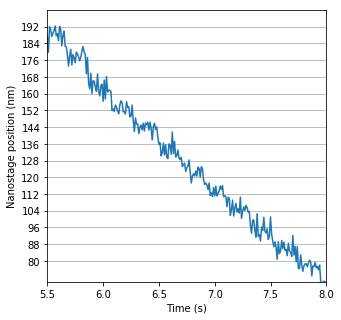

In [79]:
downsampled_rate = 100

fy = data['Force HF']['Force 1y'].downsampled_by(int(sr/downsampled_rate)).data
time = data['Force HF']['Force 1y'].downsampled_by(int(sr/downsampled_rate)).timestamps/1e9
time = time - time[0]
nanoy = data['Diagnostics']['Nano Y'].downsampled_by(int(sr/downsampled_rate)).data

fig = plt.figure(figsize=(5,5))

# plt.subplot(2,1,1)
# plt.plot(time, fy)
# plt.xlim([5, 8])
# plt.ylabel('Force 1y (pN)')

# plt.subplot(2,1,2)
ax = plt.subplot(1,1,1)
plt.plot(time, nanoy*conv_fact-2000)
plt.xlim([5.5, 8])
plt.ylim([70, 200])
plt.ylabel('Nanostage position (nm)')
lims = [2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190]
lims2=[]

for i in range(15):
    lims2.append(i*8+80)

print(lims2)
ax.set_yticks(lims2)

ax.yaxis.grid()
ax.set_xlabel('Time (s)')
plt.savefig("Force claml stepping.eps")
plt.savefig("Force claml stepping")



1.6982156897840517
0.1952019672666496


Text(0,0.5,'Total force')

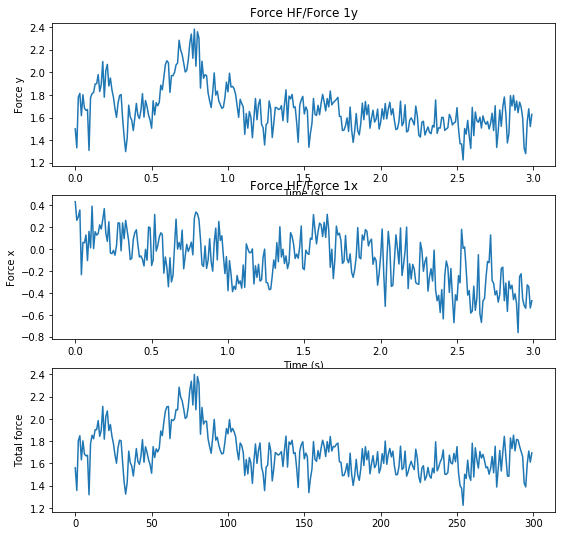

In [94]:
plt.figure(figsize=(9,9))

fy = data['Force HF']['Force 1y']['5s':'8s'].downsampled_by(int(sr/downsampled_rate))
plt.subplot(3,1,1)
fy.plot()
plt.ylabel("Force y")
# plt.xlim([5, 8])
# np.std(fy.data)

fx = data['Force HF']['Force 1x']['5s':'8s'].downsampled_by(int(sr/downsampled_rate))
plt.subplot(3,1,2)
fx.plot()
plt.ylabel("Force x")

tot_force = np.sqrt(np.power(fx.data, 2) + np.power(fy.data, 2))
print(np.mean(tot_force))

print(np.std(tot_force))


plt.subplot(3,1,3)
plt.plot(tot_force)
plt.ylabel("Total force")



In [ ]:
fy = data['Force HF']['Force 1x']['5s':'8s'].downsampled_by(int(sr/downsampled_rate))
fy.plot()
# plt.xlim([5, 8])
np.std(fy.data)

(array([ 3.,  0.,  1.,  3.,  3.,  4.,  6., 10.,  9.,  9.,  8.,  7.,  9.,
        13.,  8., 14., 18., 10.,  6., 14., 10., 12.,  9., 12.,  7., 12.,
        10., 11.,  6., 13., 20., 11., 10., 11., 12.,  7., 10., 10., 11.,
        13.,  9., 11.,  5.,  8., 10.,  8.,  9., 12., 14.,  5., 11., 12.,
        10., 11., 10., 18., 10.,  6.,  8., 15.,  9., 13., 11.,  5.,  6.,
         6.,  8.,  4.,  9.,  5.,  3.,  8.,  8.,  9.,  9.,  4., 14., 11.,
         7., 14., 17.,  6., 12.,  7.,  9.,  5., 16., 10.,  7., 12., 13.,
         8., 10., 10.,  6.,  6.,  3.,  4.,  0.,  2.]),
 array([2060.20142694, 2061.81142485, 2063.42142276, 2065.03142067,
        2066.64141858, 2068.25141649, 2069.8614144 , 2071.47141231,
        2073.08141022, 2074.69140813, 2076.30140604, 2077.91140395,
        2079.52140186, 2081.13139977, 2082.74139768, 2084.35139559,
        2085.9613935 , 2087.57139141, 2089.18138932, 2090.79138723,
        2092.40138514, 2094.01138305, 2095.62138096, 2097.23137887,
        2098.84137678, 210

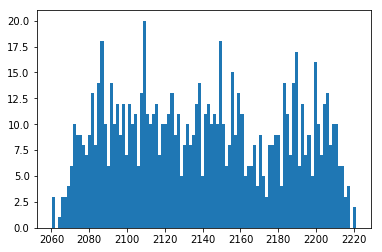

In [26]:
nanoy_channel = data['Diagnostics']['Nano Y'].downsampled_by(100)
nanoy_channel = nanoy_channel['5s':'8s']
xx = nanoy_channel.data*conv_fact

plt.hist(xx, 100)
